In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Spark DataFrames").getOrCreate()

# Correct the file path to ensure it is accessible from Databricks
df = spark.read.csv("dbfs:/Volumes/workspace/default/sam_vol/employees1.csv", header=True, inferSchema=True)

df.show()
df.printSchema()

+-----------+----------+---------+--------+------------+---------+----------+------+
|EMPLOYEE_ID|FIRST_NAME|LAST_NAME|   EMAIL|PHONE_NUMBER|HIRE_DATE|    JOB_ID|SALARY|
+-----------+----------+---------+--------+------------+---------+----------+------+
|        198|    Donald| OConnell|DOCONNEL|650.507.9833|21-Jun-07|  SH_CLERK|  2600|
|        199|   Douglas|    Grant|  DGRANT|650.507.9844|13-Jan-08|  SH_CLERK|  2600|
|        200|  Jennifer|   Whalen| JWHALEN|515.123.4444|17-Sep-03|   AD_ASST|  4400|
|        201|   Michael|Hartstein|MHARTSTE|515.123.5555|17-Feb-04|    MK_MAN| 13000|
|        202|       Pat|      Fay|    PFAY|603.123.6666|17-Aug-05|    MK_REP|  6000|
|        203|     Susan|   Mavris| SMAVRIS|515.123.7777|07-Jun-02|    HR_REP|  6500|
|        204|   Hermann|     Baer|   HBAER|515.123.8888|07-Jun-02|    PR_REP| 10000|
|        205|   Shelley|  Higgins|SHIGGINS|515.123.8080|07-Jun-02|    AC_MGR| 12008|
|        206|   William|    Gietz|  WGIETZ|515.123.8181|07-Jun-02

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("EmployeeDataAnalysis") \
    .getOrCreate()


In [0]:
df = spark.read.option("header", True) \
    .option("inferSchema", True) \
    .csv("/Volumes/workspace/default/sam_vol")
df.show()
df.printSchema()

+-----------+----------+---------+--------+------------+---------+----------+------+
|EMPLOYEE_ID|FIRST_NAME|LAST_NAME|   EMAIL|PHONE_NUMBER|HIRE_DATE|    JOB_ID|SALARY|
+-----------+----------+---------+--------+------------+---------+----------+------+
|        198|    Donald| OConnell|DOCONNEL|650.507.9833|21-Jun-07|  SH_CLERK|  2600|
|        199|   Douglas|    Grant|  DGRANT|650.507.9844|13-Jan-08|  SH_CLERK|  2600|
|        200|  Jennifer|   Whalen| JWHALEN|515.123.4444|17-Sep-03|   AD_ASST|  4400|
|        201|   Michael|Hartstein|MHARTSTE|515.123.5555|17-Feb-04|    MK_MAN| 13000|
|        202|       Pat|      Fay|    PFAY|603.123.6666|17-Aug-05|    MK_REP|  6000|
|        203|     Susan|   Mavris| SMAVRIS|515.123.7777|07-Jun-02|    HR_REP|  6500|
|        204|   Hermann|     Baer|   HBAER|515.123.8888|07-Jun-02|    PR_REP| 10000|
|        205|   Shelley|  Higgins|SHIGGINS|515.123.8080|07-Jun-02|    AC_MGR| 12008|
|        206|   William|    Gietz|  WGIETZ|515.123.8181|07-Jun-02

In [0]:
from pyspark.sql.functions import col

# Step 1: Cast Salary to numeric type and group by JOB_ID to calculate average Salary
df = df.withColumn("Salary", col("Salary").cast("double"))
df.groupBy("JOB_ID").avg("Salary").show()

# Step 5: Add Bonus Column (10% of Salary)
df = df.withColumn("Bonus", col("Salary") * 0.10)
df.show()

# Step 6: Filter High Earners (>70,000)
df.filter(col("Salary") > 70000).show()

# Step 7: Visualize in Databricks (use display function in notebook)
display(df.groupBy("JOB_ID").avg("Salary"))

+----------+-----------+
|    JOB_ID|avg(Salary)|
+----------+-----------+
|  PU_CLERK|     2780.0|
|    PU_MAN|    11000.0|
|     AD_VP|    17000.0|
|    AC_MGR|    12008.0|
|   AD_PRES|    24000.0|
|    ST_MAN|     7280.0|
|   IT_PROG|     5760.0|
|    HR_REP|     6500.0|
|FI_ACCOUNT|     7920.0|
|   AD_ASST|     4400.0|
|    PR_REP|    10000.0|
|    MK_REP|     6000.0|
|AC_ACCOUNT|     8300.0|
|    FI_MGR|    12008.0|
|    MK_MAN|    13000.0|
|  ST_CLERK|     2750.0|
|  SH_CLERK|     2600.0|
+----------+-----------+

+-----------+----------+---------+--------+------------+---------+----------+-------+------+
|EMPLOYEE_ID|FIRST_NAME|LAST_NAME|   EMAIL|PHONE_NUMBER|HIRE_DATE|    JOB_ID| Salary| Bonus|
+-----------+----------+---------+--------+------------+---------+----------+-------+------+
|        198|    Donald| OConnell|DOCONNEL|650.507.9833|21-Jun-07|  SH_CLERK| 2600.0| 260.0|
|        199|   Douglas|    Grant|  DGRANT|650.507.9844|13-Jan-08|  SH_CLERK| 2600.0| 260.0|
|        

JOB_ID,avg(Salary)
PU_CLERK,2780.0
PU_MAN,11000.0
AD_VP,17000.0
AC_MGR,12008.0
AD_PRES,24000.0
ST_MAN,7280.0
IT_PROG,5760.0
HR_REP,6500.0
FI_ACCOUNT,7920.0
AD_ASST,4400.0


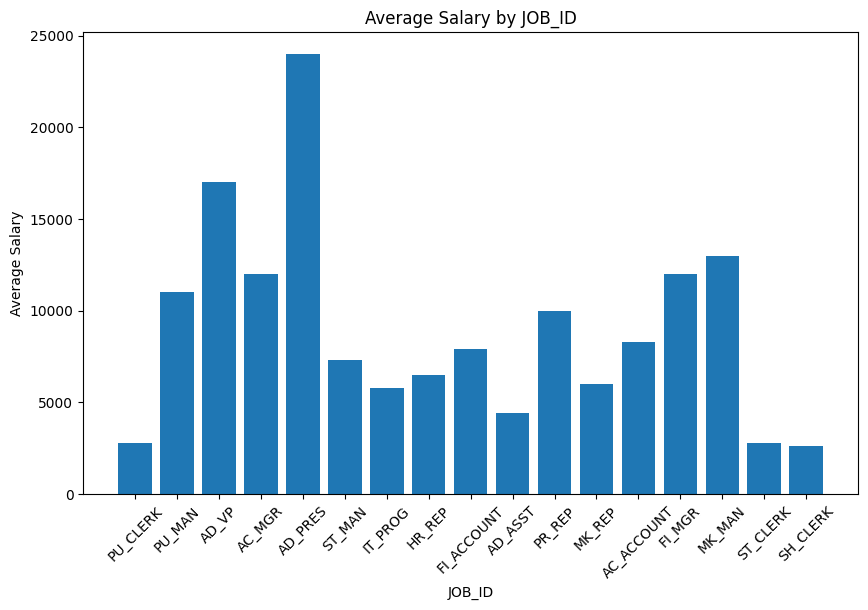

In [0]:
import matplotlib.pyplot as plt

# Step 1: Cast Salary to numeric type and group by JOB_ID to calculate average Salary
df = df.withColumn("Salary", col("Salary").cast("double"))
avg_salary_df = df.groupBy("JOB_ID").avg("Salary")

# Collect the data to a Pandas DataFrame
avg_salary_pd = avg_salary_df.toPandas()

# Step 5: Add Bonus Column (10% of Salary)
df = df.withColumn("Bonus", col("Salary") * 0.10)

# Step 6: Filter High Earners (>70,000)
high_earners_df = df.filter(col("Salary") > 70000)

# Step 7: Visualize using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(avg_salary_pd['JOB_ID'], avg_salary_pd['avg(Salary)'])
plt.xlabel('JOB_ID')
plt.ylabel('Average Salary')
plt.title('Average Salary by JOB_ID')
plt.xticks(rotation=45)
plt.show()

['EMPLOYEE_ID', 'FIRST_NAME', 'LAST_NAME', 'EMAIL', 'PHONE_NUMBER', 'HIRE_DATE', 'JOB_ID', 'Salary', 'Bonus']


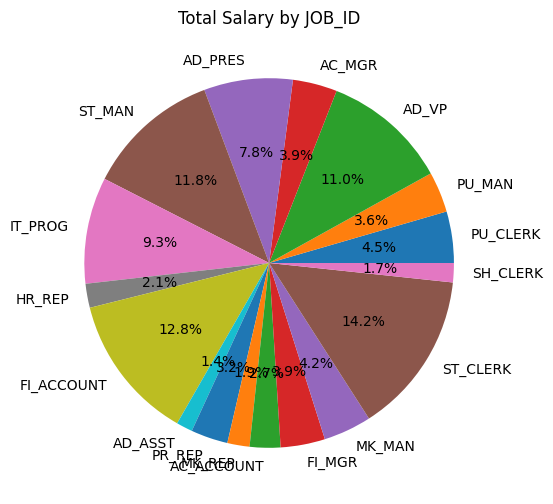

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Step 1: Cast Salary to numeric type and group by DEPARTMENT_ID to calculate total Salary
df = df.withColumn("Salary", col("Salary").cast("double"))

# Verify the column names
print(df.columns)

# Assuming the correct column name is 'DEPARTMENT_ID'
total_salary_df = df.groupBy("JOB_ID").sum("Salary")

# Collect the data to a Pandas DataFrame
total_salary_pd = total_salary_df.toPandas()

# Step 5: Add Bonus Column (10% of Salary)
df = df.withColumn("Bonus", col("Salary") * 0.10)

# Step 6: Filter High Earners (>70,000)
high_earners_df = df.filter(col("Salary") > 70000)

# Step 7: Visualize using Matplotlib
plt.figure(figsize=(10, 6))
plt.pie(total_salary_pd['sum(Salary)'], labels=total_salary_pd['JOB_ID'], autopct='%1.1f%%')
plt.title('Total Salary by JOB_ID')
plt.show()

In [0]:
# Display basic statistical summary
display(df.describe())

# Check for missing values
missing_values = df.select([col(c).isNull().cast("int").alias(c) for c in df.columns]).groupBy().sum()
display(missing_values)

summary,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,Salary,Bonus
count,50,50,50,50,50,50,50,50,50
mean,134.76,null,null,null,null,null,null,6182.32,618.232
stddev,33.631593504213456,null,null,null,null,null,null,4586.1817716319265,458.61817716319274
min,100,Adam,Atkinson,AFRIPP,515.123.4444,01-May-03,AC_ACCOUNT,2100.0,210.0
max,206,William,Whalen,WGIETZ,650.507.9844,30-Sep-05,ST_MAN,24000.0,2400.0


sum(EMPLOYEE_ID),sum(FIRST_NAME),sum(LAST_NAME),sum(EMAIL),sum(PHONE_NUMBER),sum(HIRE_DATE),sum(JOB_ID),sum(Salary),sum(Bonus)
0,0,0,0,0,0,0,0,0


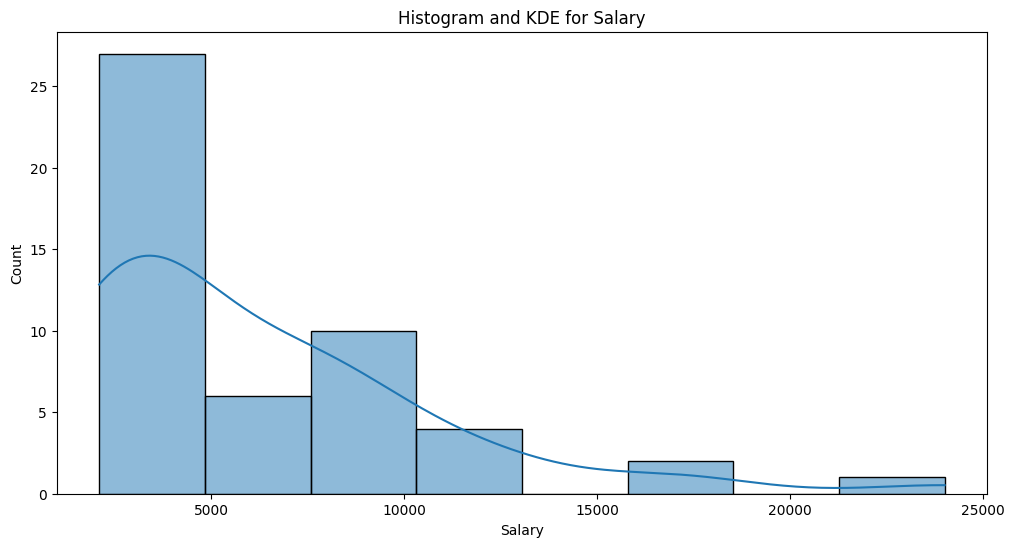

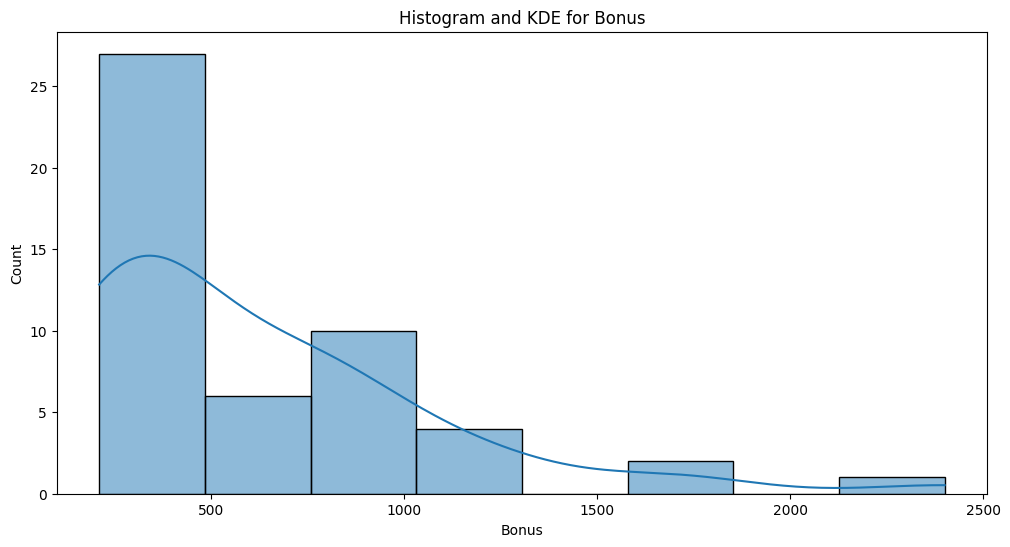

In [0]:
import seaborn as sns
import pandas as pd

# Convert to Pandas DataFrame for plotting
df_pd = df.toPandas()

# Plot histograms and KDE plots
numeric_columns = df_pd.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_pd[col], kde=True)
    plt.title(f'Histogram and KDE for {col}')
    plt.show()

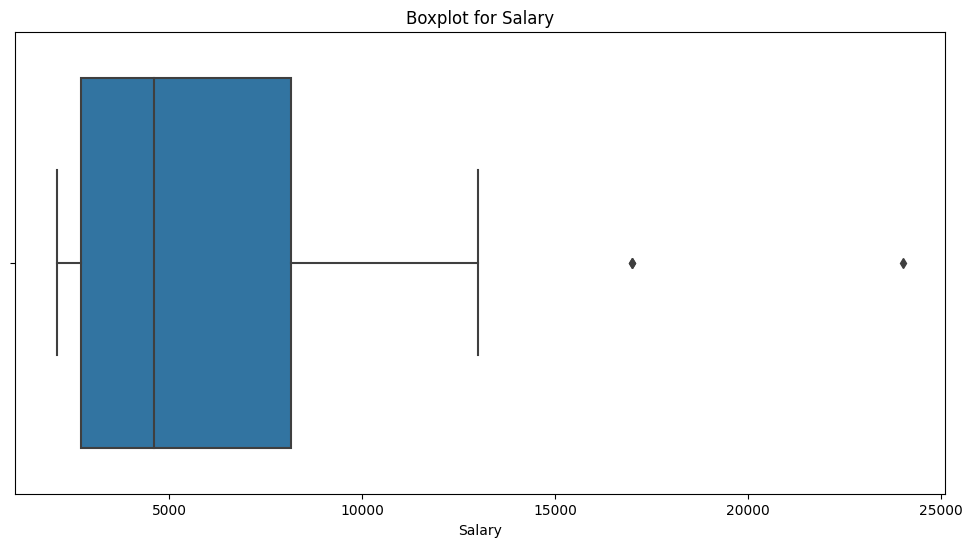

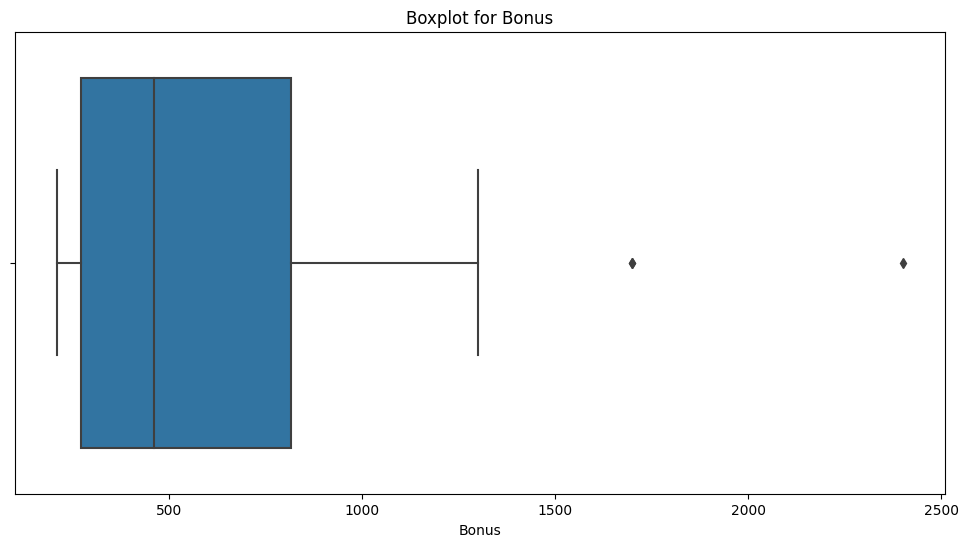

In [0]:
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_pd[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

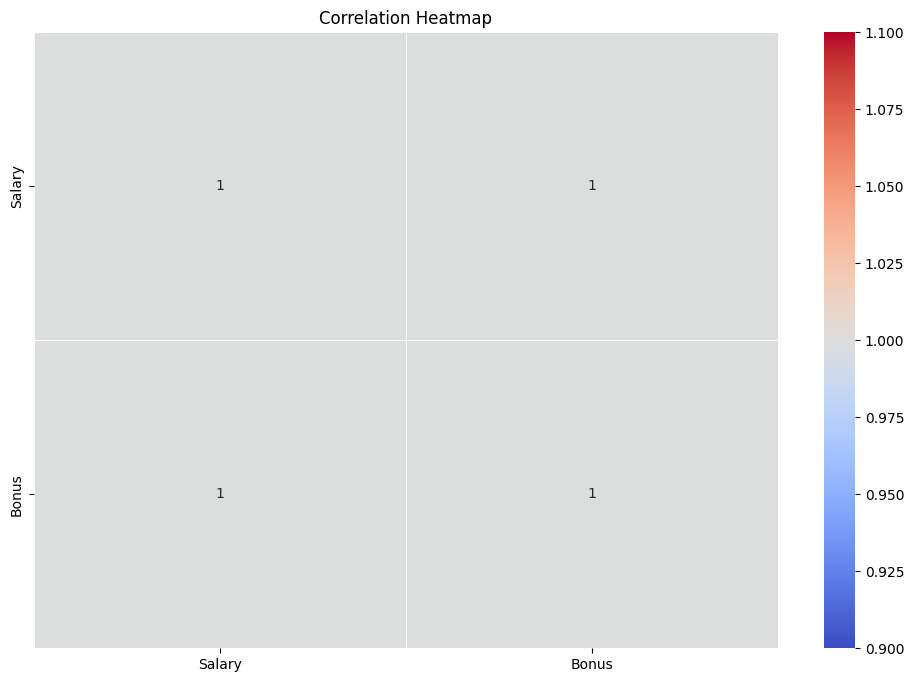

In [0]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_pd[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

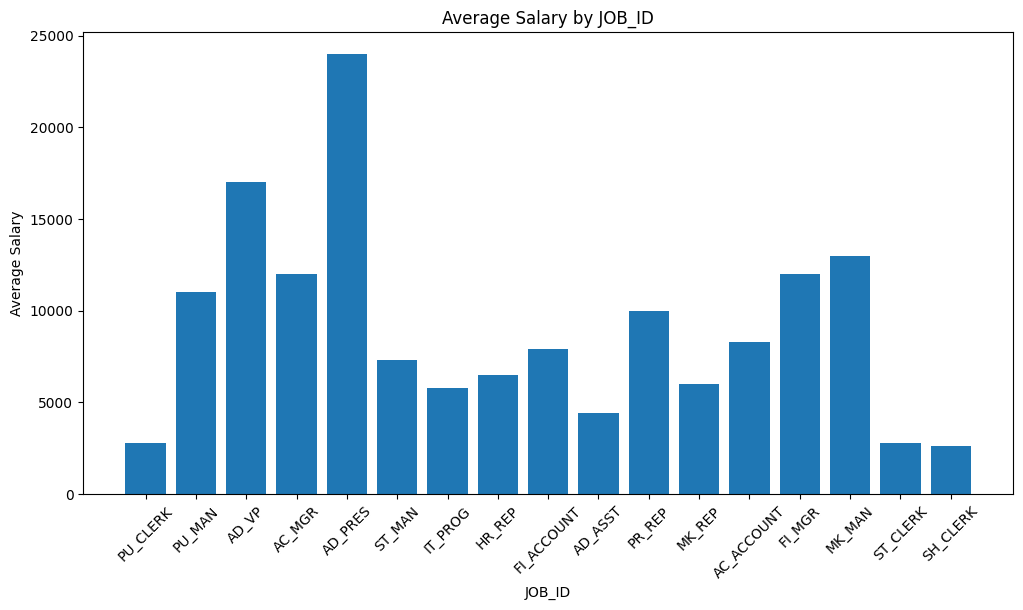

In [0]:
# Group by JOB_ID and calculate average Salary
avg_salary_df = df.groupBy("JOB_ID").avg("Salary")
avg_salary_pd = avg_salary_df.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(avg_salary_pd['JOB_ID'], avg_salary_pd['avg(Salary)'])
plt.xlabel('JOB_ID')
plt.ylabel('Average Salary')
plt.title('Average Salary by JOB_ID')
plt.xticks(rotation=45)
plt.show()

/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


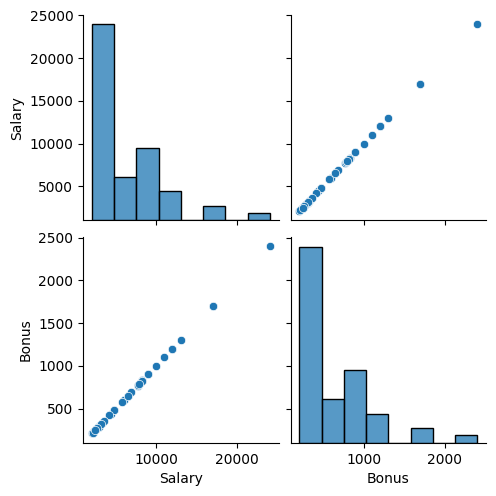

In [0]:
sns.pairplot(df_pd[numeric_columns])
plt.show()